<a href="https://colab.research.google.com/github/mthsansu/MLNLP/blob/main/Code/Descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><strong><font color="chillipepper">Parlementarian Sentiment Analysis: Descriptive statistics</font></strong></center></h1>
<h5><center><font color="green">You must describe statistically your dataset 
(distribution of words, bi-grams, POS, sentence/document length, most frequent words….) <h3><center>

Visit: https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

<center>
April 2022, Houri & Sansu
</center>

## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
from nltk.tokenize import TweetTokenizer
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import seaborn as sns
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data

In [2]:
# List of the datasets on which we will apply the operationns
list_data = ['Tweets_sample_confinement.csv', 'Tweets_sample_benalla.csv', 'Tweets_sample_CDM.csv']

In [3]:
# Import data
git_url = "https://raw.githubusercontent.com/mthsansu/MLNLP/main/Data/"
# df = pd.read_csv(git_url + 'Tweets_sample_confinement.csv', index_col=0, engine='python')
df = pd.read_csv(git_url + 'Tweets_sample_CDM.csv', index_col=0, engine='python')
# df = pd.read_csv(git_url + 'Tweets_sample_benalla.csv', index_col=0, engine='python')

In [4]:
# Create a date variable
df['date'] = df['created_at'].str[:10]
df['date'] = pd.to_datetime(df['date'])

In [5]:
# # Restreindre pour CDM
# mask = (df['date'] >= '2018-07-10') & (df['date'] <= '2018-07-20')
# df = df.loc[mask]
# df["date"].describe()

In [6]:
# # Restreindre pour Benalla
# mask = (df['date'] >= '2018-05-01') & (df['date'] <= '2018-05-15')
# df = df.loc[mask]
# df["date"].describe()

## Word-level preprocessing

In [7]:
# List of words with separator = " "
list_words = df.text.apply(lambda x: x.split(' ')).array
# Flattening to a single list
list_words = [x for X in list_words for x in X]
# Render the number of distinct words in the dataset
print('%s "words" in total for this dataset' % (len(set(list_words))))

134716 "words" in total for this dataset


In [8]:
# Usage of Phrases and Phraser from gensim
import nltk
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
nltk.download('punkt')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# Function to clean the tweets (preprocessing)
def clean(text):
    text = re.sub("@[A-Za-z0-9_]+","", text) # Removing mention
    text = re.sub(r'http\S+', '', text) # Removing link 
    text = re.sub('<.*?>', '', text) # Removing html elements
    text = text.replace('\n',' ') # Removing new line
    text = re.sub("#([a-zA-Z0-9_À-ÿ]{1,50})", '', text) # Removing hashtags
    text = re.sub(' +', ' ', text) # Remove additional spaces
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) # remove emoji
    return text
df["text_clean"] = df["text"].apply(lambda x: clean(x))

In [10]:
# List of cleaned words
list_words_2 = df.text_clean.apply(lambda x: x.split(' ')).array
list_words_2 = [x for X in list_words_2 for x in X]
print('%s cleaned "words" in total for this dataset' % (len(set(list_words_2))))

77930 cleaned "words" in total for this dataset


In [11]:
# List of tokens
list_tokens_1 = df.text.apply(lambda x: TweetTokenizer().tokenize(x)).array
list_tokens_1 = [x for X in list_tokens_1 for x in X]
print('%s tokens in total for this dataset' % (len(set(list_tokens_1))))

90855 tokens in total for this dataset


In [12]:
# List of tokens
list_tokens_2 = df.text_clean.apply(lambda x: TweetTokenizer().tokenize(x)).array
list_tokens_2 = [x for X in list_tokens_2 for x in X]
print('%s "cleaned" tokens in total for this dataset' % (len(set(list_tokens_2))))

46664 "cleaned" tokens in total for this dataset


## First statistics on the complete set of data

In [13]:
# Number of different tweets in the database
print(len(df.id.unique()),"tweets in total")

31204 tweets in total


In [14]:
# Number of different MPs in the database
print(len(df.author_id.unique()),"distinct authors")

510 distinct authors


In [15]:
# Distribution of tweets considered as possibly sensitive
print("Distribution of tweets considered as possibly sensitive \n", df.possibly_sensitive.value_counts())

Distribution of tweets considered as possibly sensitive 
 False    31162
True        42
Name: possibly_sensitive, dtype: int64


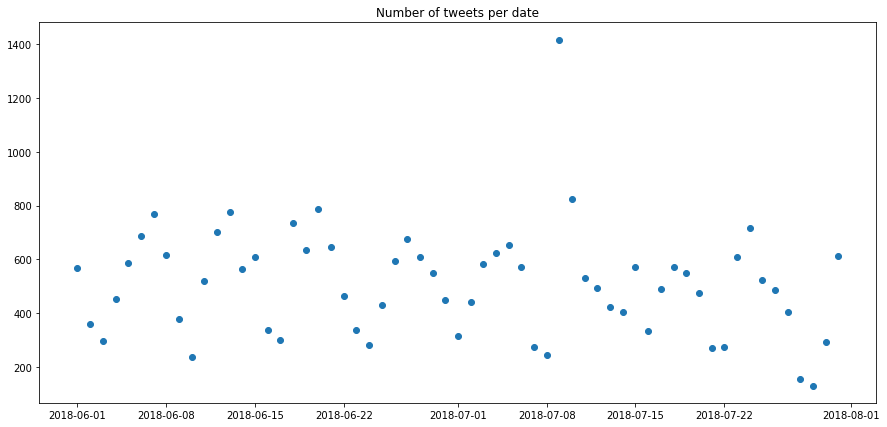

In [16]:
# Plot the number of tweets per date
x = df.date.value_counts().index # Get the date as x-axis
y = df.date.value_counts() # Get the number of tweets per date as y-axis
figure(figsize=(15, 7))
plt.title('Number of tweets per date')
plt.plot_date(x, y, xdate=True)
plt.show() # Plot the graph

Number of tweets done by MPs age:


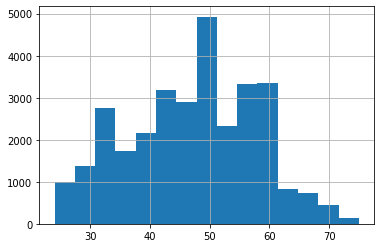

In [17]:
print("Number of tweets done by MPs age:")
df.age.hist(bins=15)

Number of tweets done by political group:


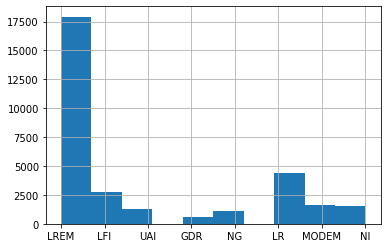

In [18]:
print("Number of tweets done by political group:")
df.groupe_sigle.hist()

In [19]:
print("Distribution of tweets by gender \n", df.sexe.value_counts())

Distribution of tweets by gender 
 M    19223
F    11981
Name: sexe, dtype: int64


In [20]:
print("Distribution of tweets by number of mandates \n", df.nb_mandats.value_counts())

Distribution of tweets by number of mandates 
 1    23332
2     7359
3      513
Name: nb_mandats, dtype: int64


In [21]:
print("Distribution of tweets according to majority belonging \n", df.majo.value_counts())

Distribution of tweets according to majority belonging 
 True     20879
False    10325
Name: majo, dtype: int64


## Some statistics on tweets themselves

In [22]:
# Mean length of tweets in characters
print("Mean length of tweets in characters:",df.text.apply(len).mean())

Mean length of tweets in characters: 228.29371234457122


In [23]:
# Number of "words": we split by a space(naive approach)
df['words_len'] = df.text_clean.apply(lambda x: len(x.split(' ')) )

In [24]:
# Mean length of tweets in characters
print("Mean length of tweets in characters:",df.words_len.mean())

Mean length of tweets in characters: 29.20987693885399


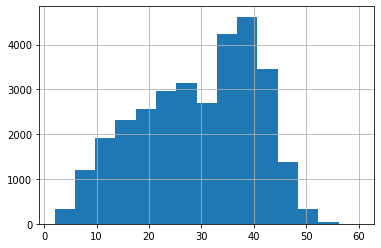

In [25]:
# Distribution of tweets according to length in words
df.words_len.hist(bins=15)

In [26]:
# Storing the average word length for each tweet
df["chr_len_words"] = df['text_clean'].str.split(' |-').\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x))

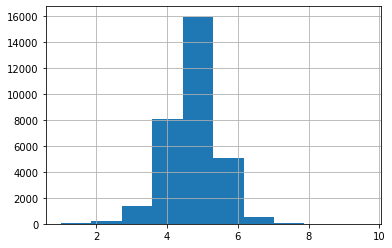

In [27]:
# Distribution of tweets according to average words length in number of characters
df.chr_len_words.hist()

In [29]:
# Analysis of stopwords
# Code taken from: https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/1-3-top-stopwords-barchart-b953763c-3fea-4331-bff0-429411793e5f/5c0fca05-ba07-4564-a02e-c44b08bfb8cb

stop=set(stopwords.words('french'))

def plot_top_stopwords_barchart(text):
  stop=stop
    
  new= df.text_clean.str.split()
  new=new.values.tolist()
  corpus=[word for i in new for word in i]
  from collections import defaultdict
  dic=defaultdict(int)
  for word in corpus:
      if word in stop:
          dic[word]+=1
          
  top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
  x,y=zip(*top)
  plt.bar(x,y)

plot_top_stopwords_barchart(df["text_clean"])

UnboundLocalError: ignored

In [ ]:
# Most frequent words

corpus=[]
new= df.text_clean.str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:80]:
    if (word.lower() not in stop):
      if (word.lower() not in list(string.punctuation)):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [ ]:
# Tri-gram exploration
# Code taken from: https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/2-0-top-ngrams-barchart-671a187d-c3b4-475a-bc9e-8aa6c937923b/c427446f-7b0e-4621-b791-47b0fd31a39e

def plot_top_ngrams_barchart(text, n=2):
    stop=stop

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(df['text_clean'],3)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = stop

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    text = re.sub("'","",str(data))
    wordcloud=wordcloud.generate(text)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

## Specificity of tweet contents

In [ ]:
# We want to match some specificity of Twitter contents and render it
hash_prog = re.compile('#') # matching hash
mention_prog = re.compile('@[A-Za-z0-9_]+') # matching mention
link_prog = re.compile(r'http\S+') # # matching url
emoji_prog = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", flags=re.UNICODE)
# Calculating number of matches for every tweet
progs = [hash_prog, mention_prog, link_prog, emoji_prog]
nb_types = ['hash', 'mention', 'link', 'emoji']
for prog, nb_type in zip(progs, nb_types):
  df[nb_type] = df['text'].apply(lambda x: len(prog.split(x))-1).array